# Black Friday Dataset EDA and Feature Engineering

In [1]:
# Importing requried Modules and Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Train Dataset

In [2]:
# Importing the train Dataset
df_train = pd.read_csv('train.csv')

In [3]:
#
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
#
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# Total number of rows and columns in dataset
df_train.shape

(550068, 12)

In [6]:
# Describe the dataset
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
# More information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
# Columns in datset
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
# Values in the dataset
df_train.values

array([[1000001, 'P00069042', 'F', ..., nan, nan, 8370],
       [1000001, 'P00248942', 'F', ..., 6.0, 14.0, 15200],
       [1000001, 'P00087842', 'F', ..., nan, nan, 1422],
       ...,
       [1006036, 'P00375436', 'F', ..., nan, nan, 137],
       [1006038, 'P00375436', 'F', ..., nan, nan, 365],
       [1006039, 'P00371644', 'F', ..., nan, nan, 490]], dtype=object)

In [10]:
# Range of index in dataset
df_train.index

RangeIndex(start=0, stop=550068, step=1)

In [11]:
# Null values in dataset
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='User_ID', ylabel='Density'>

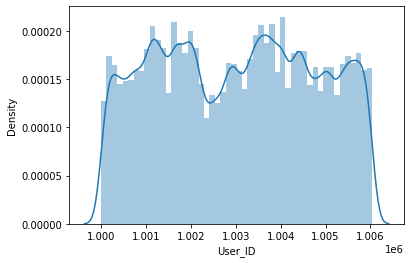

In [12]:
# Distribution plot
sns.distplot(df_train['User_ID'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Occupation', ylabel='Density'>

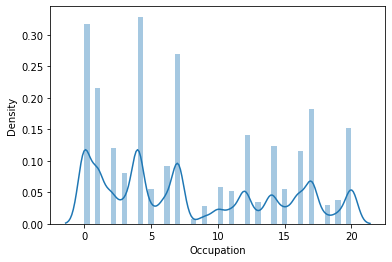

In [13]:
# Distribution plot
sns.distplot(df_train['Occupation'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marital_Status', ylabel='Density'>

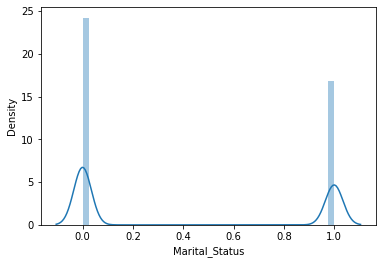

In [14]:
# Distribution plot
sns.distplot(df_train['Marital_Status'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Category_1', ylabel='Density'>

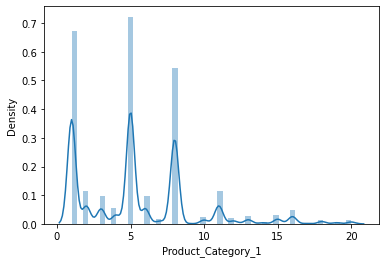

In [15]:
# Distribution plot
sns.distplot(df_train['Product_Category_1'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

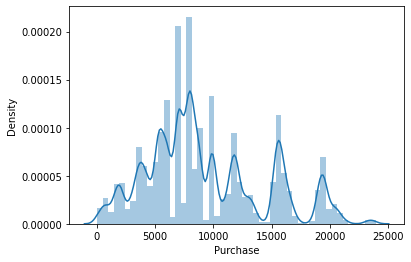

In [16]:
# Distribution plot
sns.distplot(df_train['Purchase'])

## 1. Occupation

Occupation column is a numerical column has unique values from 0 to 20. I don't know the meaning of these values, But let's show it 😊.

In [17]:
#
list(df_train['Occupation'].sort_values().unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

### Question 1.1 : Are purchase value clear vary based on occupation value 

In [18]:
# Exploratory Data Analysis (Numerically) 💰
labels = []
values = []

for uniqueOccupationValue in df_train['Occupation'].sort_values().unique():
    OccPurchaserData = df_train.loc[df_train['Occupation'] == uniqueOccupationValue]
    OccPurchaserMean = np.mean(OccPurchaserData['Purchase'])
    labels.append(uniqueOccupationValue)
    values.append(OccPurchaserMean)
    
    print("When occupation = ",uniqueOccupationValue," mean purchase value = ",OccPurchaserMean)
    print("------------------------------------------------------------")

When occupation =  0  mean purchase value =  9124.428587839973
------------------------------------------------------------
When occupation =  1  mean purchase value =  8953.193269514612
------------------------------------------------------------
When occupation =  2  mean purchase value =  8952.481683466225
------------------------------------------------------------
When occupation =  3  mean purchase value =  9178.593087818697
------------------------------------------------------------
When occupation =  4  mean purchase value =  9213.980251147868
------------------------------------------------------------
When occupation =  5  mean purchase value =  9333.149297856615
------------------------------------------------------------
When occupation =  6  mean purchase value =  9256.535691476296
------------------------------------------------------------
When occupation =  7  mean purchase value =  9425.728222819745
------------------------------------------------------------
When occ

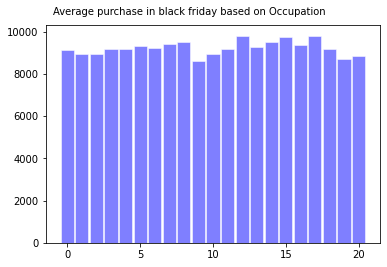

In [19]:
# Exploratory Data Analysis (Graphically) 📈
plt.bar(labels,values, width=.9, facecolor='b', edgecolor='w', alpha=.5)
plt.text(-1,10800,'Average purchase in black friday based on Occupation')
         
plt.show()

### Answer : Purchase value don't effect with occupation value. Because mean values of purchase at each occupation value nearest to each other.

## 2. Stay_In_Current_City_Years

Stay_In_Current_City_Years is a categorical column has unique values, '0', '1', '2', and '4+'. It represent number of years a purchaser stay in a city.
Let's show it 😊.

In [20]:
#
list(df_train['Stay_In_Current_City_Years'].sort_values().unique())

['0', '1', '2', '3', '4+']

Now we will convert '4+' value to 4 to can convert Stay_In_Current_City_Years column from string to int. 👇

In [21]:
#
df_train.loc[df_train['Stay_In_Current_City_Years'] == '4+','Stay_In_Current_City_Years'] = '4'
df_train['Stay_In_Current_City_Years'] = pd.to_numeric(df_train['Stay_In_Current_City_Years'])
print("Stay_In_Current_City_Years converted to int successfully")

Stay_In_Current_City_Years converted to int successfully


### Question 2.1 : Are people who stay more years buy less than people who stay less ?

In [22]:
# Exploratory Data Analysis (Numerically) 💰
labels = []
values = []
yearsCountData = []

for uniqueYearsValue in df_train['Stay_In_Current_City_Years'].sort_values().unique():
    CityYearsPurchaserData = df_train.loc[df_train['Stay_In_Current_City_Years'] == uniqueYearsValue]
    CityYearsPurchaserMean = np.mean(CityYearsPurchaserData['Purchase'])
    labels.append(uniqueYearsValue)
    values.append(CityYearsPurchaserMean)
    yearsCountData.append(CityYearsPurchaserData.shape[0])
    
    if uniqueYearsValue != 4:
        print("Mean purchase of people who stay ",uniqueYearsValue," years = ",CityYearsPurchaserMean)
    elif uniqueYearsValue == 4:
        print("Mean purchase of people who stay more than ",uniqueYearsValue," years = ",CityYearsPurchaserMean)

Mean purchase of people who stay  0  years =  9180.075122987177
Mean purchase of people who stay  1  years =  9250.145923300364
Mean purchase of people who stay  2  years =  9320.429810090536
Mean purchase of people who stay  3  years =  9286.904119221284
Mean purchase of people who stay more than  4  years =  9275.59887165687


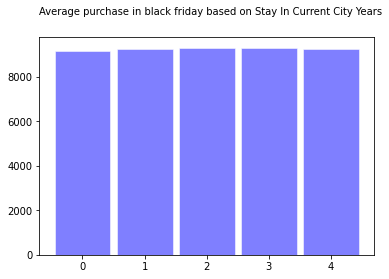

In [23]:
#Exploratory Data Analysis (Graphically) 📈
plt.bar(labels,values, width=.9, facecolor='b', edgecolor='w', alpha=.5)
plt.text(-0.7,10800,'Average purchase in black friday based on Stay In Current City Years')
         
plt.show()

### Answer: No. Because the mean purchases of people despite the varying years of stay very close

### Question 2.2 : Do people who stay longer in city have more action towards buying ?

In [24]:
# Exploratory Data Analysis (Numerically) 💰
for uniqueYearsValue in df_train['Stay_In_Current_City_Years'].sort_values().unique():
    CityYearsPurchaserData = df_train.loc[df_train['Stay_In_Current_City_Years'] == uniqueYearsValue]
    if uniqueYearsValue != 4:
        print("Number of purchasers who stay ",uniqueYearsValue," years = ",CityYearsPurchaserData.shape[0])
    elif uniqueYearsValue == 4:
        print("Number of purchasers who stay more than ",uniqueYearsValue," years = ",CityYearsPurchaserData.shape[0])

Number of purchasers who stay  0  years =  74398
Number of purchasers who stay  1  years =  193821
Number of purchasers who stay  2  years =  101838
Number of purchasers who stay  3  years =  95285
Number of purchasers who stay more than  4  years =  84726


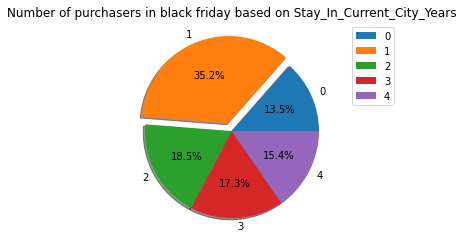

In [25]:
# Exploratory Data Analysis (Graphically) 📈
values = yearsCountData
labels = list(df_train['Stay_In_Current_City_Years'].sort_values().unique())
plt.axis('equal')

plt.pie(values, labels=labels,
              explode=[0,0.1,0,0,0],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(labels)
plt.title('Number of purchasers in black friday based on Stay_In_Current_City_Years')
plt.show()

### Answer : No. Because people who stay longer in city have less action towards buying than others. Decision : We must take care of people who stay in range 1 year in city because they have more action towards buying than others.

## 3. Marital_Status

Marital_Status is a numerical column has two value 0 and 1. This column describe if purchaser married or not. Let's show it 😊

In [26]:
#
list(df_train['Marital_Status'].unique())

[0, 1]

### Question 3.1 : Are people who married buy more than else ?

In [27]:
# Exploratory Data Analysis (Numerically) 💰
labels = []
values = []
maritalStatusCount = []

for maritalStatusValue in df_train['Marital_Status'].unique():
    maritalStatusPurchaserData = df_train.loc[df_train['Marital_Status'] == maritalStatusValue]
    maritalStatusPurchaserMean = np.mean(maritalStatusPurchaserData['Purchase'])
    labels.append(maritalStatusValue)
    values.append(maritalStatusPurchaserMean)
    maritalStatusCount.append(maritalStatusPurchaserData.shape[0])
    
    print("Mean purchase of people who marital Status is ",maritalStatusValue," = ",maritalStatusPurchaserMean)

Mean purchase of people who marital Status is  0  =  9265.907618921507
Mean purchase of people who marital Status is  1  =  9261.174574082374


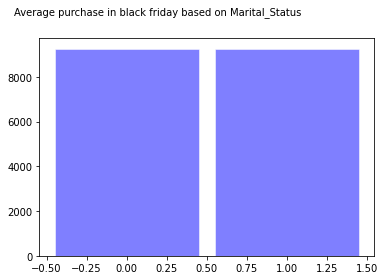

In [28]:
# Exploratory Data Analysis (Graphically) 📈
plt.bar(labels,values, width=.9, facecolor='b', edgecolor='w', alpha=.5)
plt.text(-0.7,10800,'Average purchase in black friday based on Marital_Status')
         
plt.show()

### Answer : No. Because purchasers who married or not, have almost same average of purchase.

### Question 3.2 : Do people who married have more action towards buying ?

In [29]:
# Exploratory Data Analysis (Numerically) 💰
for maritalStatusValue in df_train['Marital_Status'].unique():
    maritalStatusPurchaserData = df_train.loc[df_train['Marital_Status'] == maritalStatusValue]
    print("Number of purchasers who marital status is ",maritalStatusValue," = ",maritalStatusPurchaserData.shape[0])

Number of purchasers who marital status is  0  =  324731
Number of purchasers who marital status is  1  =  225337


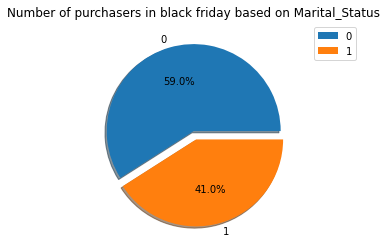

In [30]:
#
values = maritalStatusCount
labels = list(df_train['Marital_Status'].unique())
plt.axis('equal')

plt.pie(values, labels=labels,
              explode=[0,0.1],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(labels)
plt.title('Number of purchasers in black friday based on Marital_Status')
plt.show()

### Answer : Yes. Because 59% of purchasers are married.
Decision : We must take care of married than singles in the next marketing campaigns. where the ratio is 59 to 41 percent respectively.

## 4. product of category

### Question 4.1 : Are Profit from product of category 1 more or from product of category 2 ?

In [31]:
# Exploratory Data Analysis (Numerically) 💰
Product_Category_1_sum = df_train['Product_Category_1'].sum()
Product_Category_2_sum = df_train['Product_Category_2'].sum()

print("Profit from product of category 1 = ",Product_Category_1_sum)
print("Profit from product of category 2 = ",Product_Category_2_sum)

Profit from product of category 1 =  2972716
Profit from product of category 2 =  3704948.0


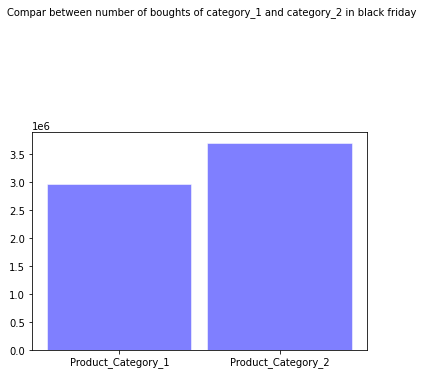

In [32]:
#
labels = ['Product_Category_1','Product_Category_2']
values = [Product_Category_1_sum,Product_Category_2_sum]

plt.bar(labels,values, width=.9, facecolor='b', edgecolor='w', alpha=.5)
plt.text(-0.7,6000000,'Compar between number of boughts of category_1 and category_2 in black friday')
         
plt.show()

 ### Answer : Profit from product of category 2 more than product of category 1.
Decision : We must take care of product of category 2 in the next marketing campaigns

## Test Dataset

In [33]:
# Importing the test Dataset
df_test = pd.read_csv('test.csv')

In [34]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [35]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [36]:
# Total number of rows and columns in dataset
df_test.shape

(233599, 11)

In [37]:
# Columns in datset
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [38]:
# Values in the dataset
df_test.values

array([[1000004, 'P00128942', 'M', ..., 1, 11.0, nan],
       [1000009, 'P00113442', 'M', ..., 3, 5.0, nan],
       [1000010, 'P00288442', 'F', ..., 5, 14.0, nan],
       ...,
       [1006036, 'P00031842', 'F', ..., 1, 5.0, 12.0],
       [1006037, 'P00124742', 'F', ..., 10, 16.0, nan],
       [1006039, 'P00316642', 'F', ..., 4, 5.0, nan]], dtype=object)

In [39]:
# More information about the dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [40]:
# Describe the dataset
df_test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [41]:
# Range of index in dataset
df_test.index

RangeIndex(start=0, stop=233599, step=1)

In [42]:
# Null values in dataset
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Occupation', ylabel='Density'>

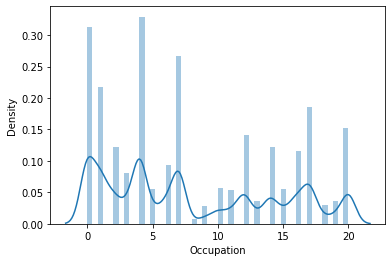

In [43]:
# Distribution plot
sns.distplot(df_test['Occupation'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marital_Status', ylabel='Density'>

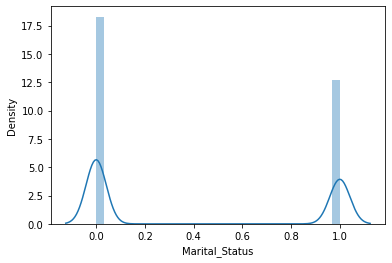

In [44]:
# Distribution plot
sns.distplot(df_test['Marital_Status'])

## Merge both the Dataset

In [45]:
# MErge both train and test data
df = df_train.append(df_test)

/var/folders/0p/_vy9x_j55gd1trtzdrx_dnqr0000gn/T/ipykernel_8134/3477338726.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


In [46]:
# Top 5 rows
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969.0


In [47]:
# Total number of rows and columns in dataset
df.shape

(783667, 12)

In [48]:
# Columns in datset
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [49]:
#
df.values

array([[1000001, 'P00069042', 'F', ..., nan, nan, 8370.0],
       [1000001, 'P00248942', 'F', ..., 6.0, 14.0, 15200.0],
       [1000001, 'P00087842', 'F', ..., nan, nan, 1422.0],
       ...,
       [1006036, 'P00031842', 'F', ..., 5.0, 12.0, nan],
       [1006037, 'P00124742', 'F', ..., 16.0, nan, nan],
       [1006039, 'P00316642', 'F', ..., 5.0, nan, nan]], dtype=object)

In [50]:
# More information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [51]:
# Describe the dataset
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [52]:
# In dataset the 'User_ID' is useless for the upcoming operations
df.drop(['User_ID'],axis = 1,inplace = True)

In [53]:
# Now this column is gone and dataset is update successfully
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969.0


In [54]:
# Check for Null values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Occupation', ylabel='Density'>

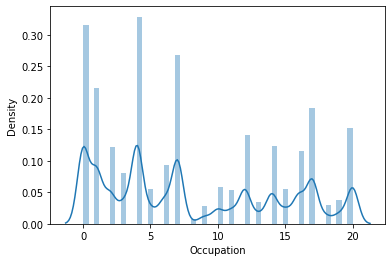

In [55]:
# Distribution plot
sns.distplot(df['Occupation'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marital_Status', ylabel='Density'>

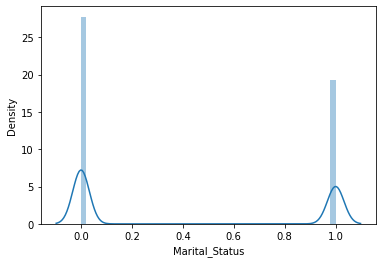

In [56]:
# Distribution plot
sns.distplot(df['Marital_Status'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Category_1', ylabel='Density'>

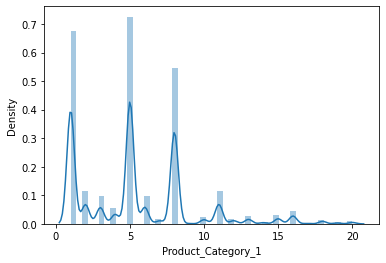

In [57]:
# Distribution plot
sns.distplot(df['Product_Category_1'])

# Data Pre-processing
1. In our data we also have some chategorical feature or characterize data eg: Age, Gender, City_Category, etc
   but our model is not gonna understand this. So we have to convert it into numerical values similar to others.

### 1. Gender

In [58]:
# Method 1
# Female --> 1  and Male --> 0
##     df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

In this method, we have to create one column by using the dataset 'Age' column and this inbuilt function. Then have to delete 'Age' column and add this new values to original dataset.

This is kind of large process.

In [59]:
# Method 2
# Using map()

df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [60]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4,0,8,NaN,NaN,7969.0


In this method we do operations in runtime while we encounter with 'F' and 'M'. So this method is more efficient than first

## 2. Age

In [61]:
# Unique Values in dataset
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [62]:
df['Age'] = df['Age'].map({'0-17' : 1, '18-25' : 2, '26-35' : 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})

In [63]:
# Check the changes in Age column 
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4,0,8,NaN,NaN,7969.0


Here we can see the Age column is not containing the range of ages, now it is containing the numerical value that indicates its range of age where it lies.

## 3. City_Category
 Fixing categorical city_category column

In [64]:
# Unique values in dataset
df['City_Category'].unique()
# Here we have 3 values and 2 values are sufficient for future

array(['A', 'C', 'B'], dtype=object)

In [65]:
# Save it in new variable for further operations
df_city = pd.get_dummies(df['City_Category'],drop_first = True)


In [66]:
# Top Values
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [67]:
# Concat to original dataset
pd.concat([df,df_city],axis = 1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,0,1


In [68]:
# Save it into original dataset
df = pd.concat([df,df_city],axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4,0,8,NaN,NaN,7969.0,0,1


In [69]:
# Now we dont need City_Category column, SO we can drop it.
df.drop('City_Category',axis = 1, inplace = True)
# inplace for make changes permanent

In [70]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4,0,8,NaN,NaN,7969.0,0,1


Here we drop City_Category column from dataset and add two new columns to dataset in terms of B and C.

## Null Values in Dataset

In [71]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

Product_Category_2, Product_Category_3 and Purchase having so many null or missing values. We have to do something of them.

## 1. Product_Category_2

In [72]:
# Unique values in Product_Category_2
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [73]:
# Different values with their count in dataset
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

nan --> None value

In [74]:
# Replace missing values with mode 
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [75]:
df['Product_Category_2'].mode()[0]

8.0

In [76]:
# Replace it
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2']).mode()[0]

In [77]:
# Check again for null values
df['Product_Category_2'].isnull().sum()

0

## 2. Product_Category_3

In [78]:
# Unique values in Product_Category_3
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [79]:
# Different values with their count in dataset
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [80]:
# Replace missing values with mode 
df['Product_Category_3'].mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [81]:
df['Product_Category_3'].mode()[0]

16.0

In [82]:
# Replace it
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3']).mode()[0]

In [83]:
# Check again for null values
df['Product_Category_3'].isnull().sum()

0

In [84]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,8.0,16.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,8.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [85]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [86]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,8.0,16.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,8.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


## 4. Stay_In_Current_City_Years

In [87]:
# Unique values in Stay_In_Current_City_Years Column
df['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0, '2', '0', '4+', '1', '3'], dtype=object)

Here we have to convert '4+' to '4'

In [88]:
# Replace '+' by '' in dataset and save it to original dataset
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')
df['Stay_In_Current_City_Years']

/var/folders/0p/_vy9x_j55gd1trtzdrx_dnqr0000gn/T/ipykernel_8134/2154818033.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
233594      4
233595      4
233596      4
233597      4
233598      4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [89]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,NaN,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,NaN,0,1,8.0,16.0,15200.0,0,0
2,P00087842,0,1,10,NaN,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,NaN,0,12,8.0,16.0,1057.0,0,0
4,P00285442,1,7,16,NaN,0,8,8.0,16.0,7969.0,0,1


Now we don't have '+4' value in Stay_In_Current_City_Years column

In [90]:
#
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  233599 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


From above result we can see that the DataTypes of 'Stay_In_Current_City_Years' column is 'Object' But, in dataset we have Integer values associated with it.
Now we have to convert these 'Object' DataTypes to 'Integer' DataTypes

In [91]:
# Convert Object to Integer
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

ValueError: cannot convert float NaN to integer

In [ ]:
df.info()

Now 'Stay_In_Current_City_Years' having elements with Integer DataTypes.
Similarly 'B' and 'C' columns having DataTypes "unit8". So we also have to change it to Intger. 

In [ ]:
# Convert Object to Integer of B column
df['B'] = df['B'].astype(int)

In [ ]:
# Convert Object to Integer of B column
df['C'] = df['C'].astype(int)

In [ ]:
#
df.info()

Now 'Stay_In_Current_City_Years', 'B' and 'C' columns having elements with "Integer" DataTypes

# Visualisation

## 1. Age VS Purchase

In [ ]:
# Barplot : Age VS Purchase
sns.barplot('Age','Purchase',hue = 'Gender',data = df)

Where In Gender,
      0 --> Male and
      1 --> Female

In [ ]:
# Make diagram more user friendly
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot('Age','Purchase',hue = 'Gender',data = df)

Observation: For every age range male purchase more products then female

## 2. Occupation VS Purchase

In [ ]:
# Barplot : Occupation VS Purchase
sns.barplot('Occupation','Purchase',hue = 'Gender',data = df)

This is kind of Uniform graph.

## 3. Product_Category_1 VS Purchase

In [ ]:
# Barplot : Product_Category_1 VS Purchase
sns.barplot('Product_Category_1','Purchase',hue = 'Gender',data = df)

## 4. Product_Category_2 VS Purchase

In [ ]:
# Barplot : Product_Category_2 VS Purchase
sns.barplot('Product_Category_2','Purchase',hue = 'Gender',data = df)

## 5. Product_Category_3 VS Purchase

In [ ]:
# Barplot : Product_Category_3 VS Purchase
sns.barplot('Product_Category_3','Purchase',hue = 'Gender',data = df)

# Feacture Scaling

In [ ]:
# Test Dataset
df_test = df[df['Purchase'].isnull()]

In [ ]:
# Train Dataset
df_train = df[~df['Purchase'].isnull()]

In [ ]:
 X = df_train.drop('Purchase',axis = 1)

In [ ]:
X.head()

In [ ]:
X.shape

In [ ]:
 y = df_train['Purchase']

In [ ]:
y

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.drop('Product_ID',axis = 1,inplace = True)
X_test.drop('Product_ID',axis = 1,inplace = True)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)